In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [52]:
data = pd.read_csv('london.csv')

In [53]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [55]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [56]:
data = data.sort_values('timestamp')

In [57]:
data = data.set_index('timestamp')

In [58]:
data.resample(rule='D')

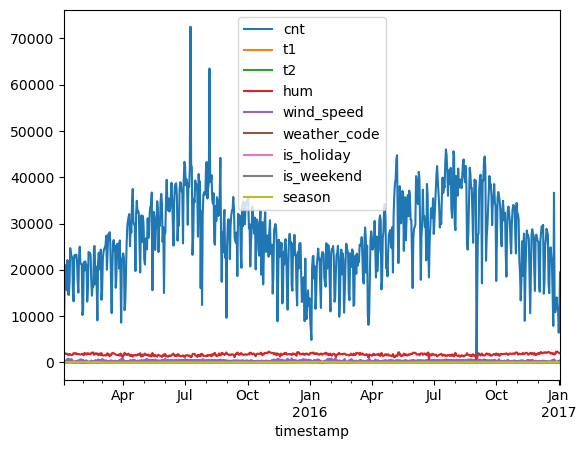

In [59]:
daily_data = data.resample(rule='D').sum().plot()

In [60]:
data['cnt_roll'] = data['cnt'].rolling(window=3).mean()

In [66]:
data_daily = data.resample(rule='D').sum()

In [67]:
data_daily['cnt_roll'] = data_daily['cnt'].rolling(window=3).mean()

In [70]:
data_daily

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_roll
timestamp,,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0,NaN
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0,NaN
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0,16739.666667
2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0,20683.000000
2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0,19092.666667
...,...,...,...,...,...,...,...,...,...,...
2016-12-30,11566,78.5,25.5,2368.5,216.0,105.0,0.0,0.0,72.0,12682.000000
2016-12-31,11424,178.5,121.0,2183.0,319.5,98.0,0.0,24.0,72.0,12347.333333
2017-01-01,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0,9803.666667


In [68]:
rentals_2015_07_09 = int(round(data_daily.loc['2015-07-09', 'cnt_roll']))

In [69]:
print(rentals_2015_07_09)

50705


In [71]:
data_daily['cnt_diff'] = data_daily['cnt'] - data_daily['cnt_roll']

In [79]:
std = np.std(data_daily['cnt_diff'])
round(std, 2)

4558.59

In [77]:
std = data.resample(rule='D').std()

In [86]:
data_daily['upper_bound'] = data_daily['cnt_roll'] + 2.576 * std
data_daily['lower_bound'] = data_daily['cnt_roll'] - 2.576 * std

In [88]:
print(round(data_daily.iloc[-1]['upper_bound'], 2))

24302.92


In [89]:
data_daily

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_roll,cnt_diff,upper_bound,lower_bound
timestamp,,,,,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0,NaN,NaN,NaN,NaN
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0,NaN,NaN,NaN,NaN
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0,16739.666667,3873.333333,28482.585854,4996.747479
2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0,20683.000000,381.000000,32425.919188,8940.080812
2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0,19092.666667,-3491.666667,30835.585854,7349.747479
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30,11566,78.5,25.5,2368.5,216.0,105.0,0.0,0.0,72.0,12682.000000,-1116.000000,24424.919188,939.080812
2016-12-31,11424,178.5,121.0,2183.0,319.5,98.0,0.0,24.0,72.0,12347.333333,-923.333333,24090.252521,604.414146
2017-01-01,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0,9803.666667,-3382.666667,21546.585854,-1939.252521


In [91]:
data_daily[data_daily['cnt'] < data_daily['lower_bound']]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_roll,cnt_diff,upper_bound,lower_bound
timestamp,,,,,,,,,,,,,
2015-05-14,15609,237.5,189.5,2039.0,513.0,118.0,0.0,0.0,0.0,28709.333333,-13100.333333,40452.252521,16966.414146
2015-07-12,23240,444.5,444.5,1811.5,520.5,80.0,0.0,24.0,24.0,36036.666667,-12796.666667,47779.585854,24293.747479
2015-07-24,16034,380.5,380.5,1810.0,275.0,108.0,0.0,0.0,24.0,31013.666667,-14979.666667,42756.585854,19270.747479
2015-08-24,17400,380.0,380.0,2099.0,321.0,126.0,0.0,0.0,24.0,29529.333333,-12129.333333,41272.252521,17786.414146
2015-11-14,8898,270.0,235.0,1951.0,560.0,105.0,0.0,24.0,48.0,21037.333333,-12139.333333,32780.252521,9294.414146
2016-09-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26086.333333,-26086.333333,37829.252521,14343.414146
2016-09-10,17080,460.0,460.0,1932.0,392.0,89.0,0.0,24.0,48.0,31262.000000,-14182.000000,43004.919188,19519.080812
2016-09-16,21967,416.0,416.0,1900.5,416.0,115.0,0.0,0.0,48.0,36193.333333,-14226.333333,47936.252521,24450.414146
2016-11-12,8990,214.0,180.0,1976.0,247.5,108.0,0.0,23.0,46.0,20878.000000,-11888.000000,32620.919188,9135.080812
